In [1]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time

In [ ]:
#input your token here
os.environ['TOKEN'] = "AAAAAAAAAAAAAAAAAAAAAN3ragEAAAAA2jfyUGcgSX8Lq71Eoj4%2Ba3dUP8o%3DWGfP6veN0uKshFlJsrpx2HUAQ9cWIwy3l3rK9a4UpPSGqPhyym"

In [ ]:
#after every request, we want to retrieve the token again to keep going on
def auth():
    return os.getenv('TOKEN')

In [ ]:
#function to create headers which authorize our requests
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

In [ ]:
#create urls to run our search

def create_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/all" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {"'b26v89c19zqg8o3fosqtyj5svl07ptctnkv04fcrjsqd9'"}}
    return (search_url, query_params)

In [ ]:
#function to end our search
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [ ]:
#Inputs for the request
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = "jai shri ram"
start_time = "2020-02-15T00:00:00.000Z"
end_time = "2020-03-02T00:00:00.000Z"
max_results = 500

In [ ]:
url = create_url(keyword, start_time,end_time, max_results)
json_response = connect_to_endpoint(url[0], headers, url[1])

In [ ]:
print(json.dumps(json_response, indent=4, sort_keys=True))

In [ ]:
json_response['data']

In [ ]:
json_response['meta']['result_count']

#352 tweets retrieved in this round

In [ ]:
outpath = "C:\\Users\\anush\\Desktop\\McGill\\Fall 2022\\COMS 655\\Final paper\\Code\\output\\"

with open(outpath + 'hatespeechtest.json', 'w') as f:
    json.dump(json_response, f)

In [ ]:
json_response

In [ ]:

# Create file
csvFile = open(outpath + "hatespeechtest.csv", "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

#Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow(['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet'])
csvFile.close()

In [ ]:

def append_to_csv(json_response, fileName):

    #A counter variable
    counter = 0

    #Open OR create the target CSV file
    csvFile = open(fileName, "a", newline="", encoding='utf-8')
    csvWriter = csv.writer(csvFile)

    #Loop through each tweet
    for tweet in json_response['data']:
        
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that

        # 1. Author ID
        author_id = tweet['author_id']

        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])

        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "

        # 4. Tweet ID
        tweet_id = tweet['id']

        # 5. Language
        lang = tweet['lang']

        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']

        # 7. source
        source = tweet['source']

        # 8. Tweet text
        text = tweet['text']
        
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count, source, text]
        
        # Append the result to the CSV file
        csvWriter.writerow(res)
        counter += 1

    # When done, close the CSV file
    csvFile.close()

    # Print the number of tweets for this iteration
    print("# of Tweets added from this response: ", counter) 

In [ ]:
append_to_csv(json_response, "hatespeechtest.csv")

In [ ]:
#imp: repeat this bit of code before converting into a dataframe for all relevant keywords

outpath = "C:\\Users\\anush\\Desktop\\McGill\\Fall 2022\\COMS 655\\Final paper\\Code\\output\\"
#Inputs for tweets
#almost 1 year of scrape so it should have a lot of tweets
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = 'JaiShriRam OR jai_shri_ram OR Jaishreeram OR jai_shree_ram OR Jai_Shri_Ram OR jai_shree_ram lang:en -is:retweet'
start_list =    ['2020-02-15T00:00:00.000Z',
                 '2020-02-23T00:00:00.000Z']

end_list =      ['2020-02-23T00:00:00.000Z',
                 '2020-03-02T00:00:00.000Z']
max_results = 500

#Total number of tweets we collected from the loop
total_tweets = 0

# Create file
csvFile = open(outpath + "HateSpeechData1.csv", "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

#Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow(['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet'])
csvFile.close()

for i in range(0,len(start_list)):

    # Inputs
    count = 0 # Counting tweets per time period
    max_count = 500 # Max tweets per time period
    flag = True
    next_token = None
    
    # Check if flag is true
    while flag:
        # Check if max_count reached
        if count >= max_count:
            break
        print("-------------------")
        print("Token: ", next_token)
        url = create_url(keyword, start_list[i],end_list[i], max_results)
        json_response = connect_to_endpoint(url[0], headers, url[1], next_token)
        result_count = json_response['meta']['result_count']

        if 'next_token' in json_response['meta']:
            # Save the token to use for next call
            next_token = json_response['meta']['next_token']
            print("Next Token: ", next_token)
            if result_count is not None and result_count > 0 and next_token is not None:
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, outpath + "HateSpeechData1.csv")
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)                
        # If no next token exists
        else:
            if result_count is not None and result_count > 0:
                print("-------------------")
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, outpath + "HateSpeechData1.csv")
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)
            
            #Since this is the final request, turn flag to false to move to the next time period.
            flag = False
            next_token = None
        time.sleep(5)
print("Total number of results: ", total_tweets)

In [2]:
outpath = "C:\\Users\\anush\\Desktop\\McGill\\Fall 2022\\COMS 655\\Final paper\\Code\\output\\"
all_data = outpath + 'HateSpeechData1.csv'

#get data read and drop any empty row

Keyword_meta = pd.read_csv(all_data, encoding='latin1')

In [3]:
Keyword_meta = Keyword_meta.dropna(axis=0, subset=['tweet'])

In [4]:
len(set(Keyword_meta['lang']))

#data obtained in 13 languages

13

In [5]:
#meta_filtered = Keyword_meta[(Keyword_meta['lang'] == 'en') |  (Keyword_meta['lang'] =='hi')]
meta_filtered = Keyword_meta[(Keyword_meta['lang'] == 'en') | (Keyword_meta['lang'] == 'hi')]
meta_filtered.reset_index()

,index,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,0,1167397204836806658,2020-02-22 23:54:40+00:00,14f65b4725cea78b,1231366729441456130,hi,0,0,0,0,Twitter for Android,@gudiyaqazplm579 Jai shree ram âºsubh prabhat...
1,2,872773972034703360,2020-02-22 23:52:26+00:00,,1231366165412425728,hi,0,0,0,0,Twitter for Android,@aajtak @ShivendraAajTak Jai shri ram
2,3,550944669,2020-02-22 23:48:48+00:00,,1231365250542256128,en,1,0,0,0,Twitter for Android,Koti Koti Naman @Vandematram1130 for your kind...
3,4,873505632669847552,2020-02-22 23:44:26+00:00,,1231364152234561536,hi,0,0,0,0,Twitter for Android,@anju_ladli Jai shri ram jai hanuman
4,5,1207766776311738369,2020-02-22 23:39:59+00:00,,1231363034154594304,hi,0,0,0,0,Twitter for Android,Jai Shree Ram #à¤¹à¤¾à¤_à¤®à¥à¤_à¤¹à¤¿à¤¨à¥...
...,...,...,...,...,...,...,...,...,...,...,...,...
1557,1679,834312568445472768,2020-03-01 18:52:37+00:00,,1234189817476505600,en,0,0,0,786,Twitter for Android,RT @MODIfiedVikas: Friends we have collected o...
1558,1680,1910569500,2020-03-01 18:52:26+00:00,,1234189772106551296,hi,0,0,0,0,Twitter Web App,@KmSaravag Jai Shree Ramð
1559,1682,2731225422,2020-03-01 18:52:22+00:00,,1234189756252086272,hi,0,0,0,0,Twitter for Android,@Gautamshandily5 Jai Shri Ram
1560,1683,4625079372,2020-03-01 18:52:10+00:00,,1234189705534566405,en,0,0,0,0,Twitter for iPhone,@Rajput_Ramesh @DelhiPolice @Dr_Uditraj Ankur ...


In [6]:
meta_unique=meta_filtered.drop_duplicates()
meta_unique.reset_index()

,index,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,0,1167397204836806658,2020-02-22 23:54:40+00:00,14f65b4725cea78b,1231366729441456130,hi,0,0,0,0,Twitter for Android,@gudiyaqazplm579 Jai shree ram âºsubh prabhat...
1,2,872773972034703360,2020-02-22 23:52:26+00:00,,1231366165412425728,hi,0,0,0,0,Twitter for Android,@aajtak @ShivendraAajTak Jai shri ram
2,3,550944669,2020-02-22 23:48:48+00:00,,1231365250542256128,en,1,0,0,0,Twitter for Android,Koti Koti Naman @Vandematram1130 for your kind...
3,4,873505632669847552,2020-02-22 23:44:26+00:00,,1231364152234561536,hi,0,0,0,0,Twitter for Android,@anju_ladli Jai shri ram jai hanuman
4,5,1207766776311738369,2020-02-22 23:39:59+00:00,,1231363034154594304,hi,0,0,0,0,Twitter for Android,Jai Shree Ram #à¤¹à¤¾à¤_à¤®à¥à¤_à¤¹à¤¿à¤¨à¥...
...,...,...,...,...,...,...,...,...,...,...,...,...
1557,1679,834312568445472768,2020-03-01 18:52:37+00:00,,1234189817476505600,en,0,0,0,786,Twitter for Android,RT @MODIfiedVikas: Friends we have collected o...
1558,1680,1910569500,2020-03-01 18:52:26+00:00,,1234189772106551296,hi,0,0,0,0,Twitter Web App,@KmSaravag Jai Shree Ramð
1559,1682,2731225422,2020-03-01 18:52:22+00:00,,1234189756252086272,hi,0,0,0,0,Twitter for Android,@Gautamshandily5 Jai Shri Ram
1560,1683,4625079372,2020-03-01 18:52:10+00:00,,1234189705534566405,en,0,0,0,0,Twitter for iPhone,@Rajput_Ramesh @DelhiPolice @Dr_Uditraj Ankur ...


In [8]:
meta_unique.drop(columns = ['geo', 'lang', 'source', 'id', 'author id', 'like_count', 'quote_count', 'reply_count', 'retweet_count'])
meta_unique.reset_index()

,index,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,0,1167397204836806658,2020-02-22 23:54:40+00:00,14f65b4725cea78b,1231366729441456130,hi,0,0,0,0,Twitter for Android,@gudiyaqazplm579 Jai shree ram âºsubh prabhat...
1,2,872773972034703360,2020-02-22 23:52:26+00:00,,1231366165412425728,hi,0,0,0,0,Twitter for Android,@aajtak @ShivendraAajTak Jai shri ram
2,3,550944669,2020-02-22 23:48:48+00:00,,1231365250542256128,en,1,0,0,0,Twitter for Android,Koti Koti Naman @Vandematram1130 for your kind...
3,4,873505632669847552,2020-02-22 23:44:26+00:00,,1231364152234561536,hi,0,0,0,0,Twitter for Android,@anju_ladli Jai shri ram jai hanuman
4,5,1207766776311738369,2020-02-22 23:39:59+00:00,,1231363034154594304,hi,0,0,0,0,Twitter for Android,Jai Shree Ram #à¤¹à¤¾à¤_à¤®à¥à¤_à¤¹à¤¿à¤¨à¥...
...,...,...,...,...,...,...,...,...,...,...,...,...
1557,1679,834312568445472768,2020-03-01 18:52:37+00:00,,1234189817476505600,en,0,0,0,786,Twitter for Android,RT @MODIfiedVikas: Friends we have collected o...
1558,1680,1910569500,2020-03-01 18:52:26+00:00,,1234189772106551296,hi,0,0,0,0,Twitter Web App,@KmSaravag Jai Shree Ramð
1559,1682,2731225422,2020-03-01 18:52:22+00:00,,1234189756252086272,hi,0,0,0,0,Twitter for Android,@Gautamshandily5 Jai Shri Ram
1560,1683,4625079372,2020-03-01 18:52:10+00:00,,1234189705534566405,en,0,0,0,0,Twitter for iPhone,@Rajput_Ramesh @DelhiPolice @Dr_Uditraj Ankur ...


In [ ]:
#from cleantext import *

In [ ]:
# Extract only reviews text
#tweets = pd.DataFrame(meta_unique.tweet)

In [ ]:
#tweets

In [ ]:
#clean_tweets = clean(tweets, 'tweet')

In [9]:
#flat_tweets = [item for sublist in just_tweets for item in sublist]
flat_tweets = meta_unique['tweet'].tolist()

In [10]:
#clean_tweets = clean(flat_tweets)
flat_tweets

['@gudiyaqazplm579 Jai shree ram â\x98ºsubh prabhat â\x98º',
 '@aajtak @ShivendraAajTak Jai shri ram',
 'Koti Koti Naman @Vandematram1130 for your kind words and appreciation, it means a lot, provides more strength to fight for Dharma. Dhanyabad for your beningn support..May Mahadev will strengthen, gives more power to you. Jai Shree Ram ð\x9f\x99\x8fð\x9f\x99\x8f https://t.co/DdXZU7Dwhv',
 '@anju_ladli Jai shri ram jai hanuman',
 'Jai Shree Ram #à¤¹à¤¾à¤\x81_à¤®à¥\x88à¤\x82_à¤¹à¤¿à¤¨à¥\x8dà¤¦à¥\x82_à¤¹à¥\x81à¤\x81',
 '@desi_thug1 @IndiaArtHistory @punarutthana @dharmicverangna @ugtunga @realth_sandeep @iamvinitshinde @AGANDHIG @VRAFans @ShekharSurvi Humare desh ke kuch yuva bas nanga nach jante hai bas, see this beauty ð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8c Jai Shree Ramð\x9f\x99\x8f',
 "RT @DeeVenShe: @LostTemple7 @Me_InSoLiTuDe This is the only Rama Temple where instead of Hanuman, Sugreeva is at the Lord's feet. The entirâ\x80¦",
 '@DSCHAUDHARY24 Jai shre

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
sentences = []

#append each sentence here by sent_tokenize

for counter, item in enumerate(flat_tweets):
    each_sentence = nltk.sent_tokenize(str(item))
    sentences.append(each_sentence)

In [13]:
sentences

[['@gudiyaqazplm579 Jai shree ram â\x98ºsubh prabhat â\x98º'],
 ['@aajtak @ShivendraAajTak Jai shri ram'],
 ['Koti Koti Naman @Vandematram1130 for your kind words and appreciation, it means a lot, provides more strength to fight for Dharma.',
  'Dhanyabad for your beningn support..May Mahadev will strengthen, gives more power to you.',
  'Jai Shree Ram ð\x9f\x99\x8fð\x9f\x99\x8f https://t.co/DdXZU7Dwhv'],
 ['@anju_ladli Jai shri ram jai hanuman'],
 ['Jai Shree Ram #à¤¹à¤¾à¤\x81_à¤®à¥\x88à¤\x82_à¤¹à¤¿à¤¨à¥\x8dà¤¦à¥\x82_à¤¹à¥\x81à¤\x81'],
 ['@desi_thug1 @IndiaArtHistory @punarutthana @dharmicverangna @ugtunga @realth_sandeep @iamvinitshinde @AGANDHIG @VRAFans @ShekharSurvi Humare desh ke kuch yuva bas nanga nach jante hai bas, see this beauty ð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8c Jai Shree Ramð\x9f\x99\x8f'],
 ["RT @DeeVenShe: @LostTemple7 @Me_InSoLiTuDe This is the only Rama Temple where instead of Hanuman, Sugreeva is at the Lord's feet.",
  'The entirâ\x80¦

In [16]:
#now open up this list of strings


sentences1 = [item for sublist in sentences for item in sublist]
len(sentences1)

2585

In [17]:
stoplist= ["à", "á", "â", "ã", "ä", "å", "1", "3/4", "Quâ", "Quã", "amp", "disabled", "artical", "edit", "qua", "rt", "wikipedia", "amp", "theskindoctor13", "abhinavrajvansi","foot", "swati_gs", "nutan_jyot", "pm", "11", "pnrathod1", "drsdwivedi7", "muralydoctrack1", "divyamshu_2010", "sanjaygobind", "vaidyvoice", "dilipswatisri", "romy1965", "rajesh201963", "kanimozhi", "shawshanko", "divya0094", "riturathaur", "120crorehindus", "mvnair212", "akri2000", "bhaktswamy", "bjpgmdasspondy", "kavya249", "sankalpa", "30", "ist", "exactly", "pradesh", "uttar", "kindly", "reply", "dwarkaâ", "bjp4india", "pls", "tweet", "trujagdish", "shâ", "mojo", "followers", "creativeindian9", "yeah", "gautamshandily5", "ji", "fadnavis", "piyushgoyal", "rajput_ramesh", "good", "n56gbdrlgp", "ranaayyub", "rt", "wanted", "suhagashukla", "fareedzakaria", "thâ", "told", "residents", "chowkidararju14", "nileshd08096586", "nish_dubey", "itskattarhindu", "adityakrishnaji", "bindapressed", "arunramratansa9", "pushpendrahind3", "harishv08767125", "per", "nks07173093", "kalotraarjun83", "drvikasnirmal1", "narangvipin", "dystopian", "assassi88313810", "iamurreckoning_", "edwardgluce", "saw pokershash", "_biswajit__", "yehaccntfakehai", "realkadaknath", "danda__pani", "mask_jhakkas", "wanderingtitan1", "rdx_maharaj", "r_tenali_o", "flamingooppa", "jaishriram2002", "imnirajkk", "prof_salva7", "presheart", "harshan26666001", "brownianeffect", "paanibhaat", "nik59067", "chalnabey2", "ahambrham", "tanjiroaoba", "_yogendra_singh", "deekshadelhi", "ishwar19s", "sonbhadra", "alitku15466654", "usha80406617", "haribilash89" "_sunitapanwar", "yourcharan1967", "vikasknirmal", "ourprideshehnaaz", "vishnundtv", "flipperyuvraj", "rubikaliyaquat", "fnwfz3mmaf", "mamataofficial", 'i', "of", "the", "will", "a", "is", "in", "on", "it", "to", "that", "be", "not", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "@", "http", "https", "good morning", "RT"]
sentences2 = [item for sublist in sentences for item in sublist if item not in stoplist]
len(sentences2)

2585

In [18]:
sentences2

['@gudiyaqazplm579 Jai shree ram â\x98ºsubh prabhat â\x98º',
 '@aajtak @ShivendraAajTak Jai shri ram',
 'Koti Koti Naman @Vandematram1130 for your kind words and appreciation, it means a lot, provides more strength to fight for Dharma.',
 'Dhanyabad for your beningn support..May Mahadev will strengthen, gives more power to you.',
 'Jai Shree Ram ð\x9f\x99\x8fð\x9f\x99\x8f https://t.co/DdXZU7Dwhv',
 '@anju_ladli Jai shri ram jai hanuman',
 'Jai Shree Ram #à¤¹à¤¾à¤\x81_à¤®à¥\x88à¤\x82_à¤¹à¤¿à¤¨à¥\x8dà¤¦à¥\x82_à¤¹à¥\x81à¤\x81',
 '@desi_thug1 @IndiaArtHistory @punarutthana @dharmicverangna @ugtunga @realth_sandeep @iamvinitshinde @AGANDHIG @VRAFans @ShekharSurvi Humare desh ke kuch yuva bas nanga nach jante hai bas, see this beauty ð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8c Jai Shree Ramð\x9f\x99\x8f',
 "RT @DeeVenShe: @LostTemple7 @Me_InSoLiTuDe This is the only Rama Temple where instead of Hanuman, Sugreeva is at the Lord's feet.",
 'The entirâ\x80¦',
 '@DSCHAUDHAR

In [19]:
# FAST TOKENIZE function

def fast_tokenize(text):
    
    # Get a list of punctuation marks
    from string import punctuation
    
    # Iterate through text removing punctuation characters
    no_punct = "".join([char for char in text if char not in punctuation])
    
    # Split text over whitespace into list of words
    tokens = no_punct.split()
    
    return tokens

#we are working at the corpus level so we are not maintaining them by indices.

In [20]:
# Word tokenize now using fast_tokenize

words_by_sentence = [fast_tokenize(sentence.lower()) for sentence in sentences1]


In [21]:
stoplist= ["à", "á", "â", "ã", "ä", "å", "1", "3/4", "Quâ", "Quã", "amp", "disabled", "artical", "edit", "qua", "rt", "wikipedia", "amp", "theskindoctor13", "abhinavrajvansi","foot", "swati_gs", "nutan_jyot", "pm", "11", "pnrathod1", "drsdwivedi7", "muralydoctrack1", "divyamshu_2010", "sanjaygobind", "vaidyvoice", "dilipswatisri", "romy1965", "rajesh201963", "kanimozhi", "shawshanko", "divya0094", "riturathaur", "120crorehindus", "mvnair212", "akri2000", "bhaktswamy", "bjpgmdasspondy", "kavya249", "sankalpa", "30", "ist", "exactly", "pradesh", "uttar", "kindly", "reply", "dwarkaâ", "bjp4india", "pls", "tweet", "trujagdish", "shâ", "mojo", "followers", "creativeindian9", "yeah", "gautamshandily5", "ji", "fadnavis", "piyushgoyal", "rajput_ramesh", "good", "n56gbdrlgp", "ranaayyub", "rt", "wanted", "suhagashukla", "fareedzakaria", "thâ", "told", "residents", "chowkidararju14", "nileshd08096586", "nish_dubey", "itskattarhindu", "adityakrishnaji", "bindapressed", "arunramratansa9", "pushpendrahind3", "harishv08767125", "per", "nks07173093", "kalotraarjun83", "drvikasnirmal1", "narangvipin", "dystopian", "assassi88313810", "iamurreckoning_", "edwardgluce", "saw pokershash", "_biswajit__", "yehaccntfakehai", "realkadaknath", "danda__pani", "mask_jhakkas", "wanderingtitan1", "rdx_maharaj", "r_tenali_o", "flamingooppa", "jaishriram2002", "imnirajkk", "prof_salva7", "presheart", "harshan26666001", "brownianeffect", "paanibhaat", "nik59067", "chalnabey2", "ahambrham", "tanjiroaoba", "_yogendra_singh", "deekshadelhi", "ishwar19s", "sonbhadra", "alitku15466654", "usha80406617", "haribilash89" "_sunitapanwar", "yourcharan1967", "vikasknirmal", "ourprideshehnaaz", "vishnundtv", "flipperyuvraj", "rubikaliyaquat", "fnwfz3mmaf", "mamataofficial", 'i', "of", "the", "will", "a", "is", "in", "on", "it", "to", "that", "be", "not", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "@", "http", "https", "good morning", "RT"]

filtered_list=[]
for sublist in words_by_sentence:
    if any(item in stoplist for item in sublist):
        continue
    filtered_list.append(sublist)

In [22]:
len(filtered_list)

794

In [24]:
len(words_by_sentence)

2585

In [25]:
stoplist= ["à", "á", "â", "ã", "ä", "å", "1", "3/4", "Quâ", "Quã", "amp", "disabled", "artical", "edit", "qua", "rt", "wikipedia", "amp", "theskindoctor13", "abhinavrajvansi","foot", "swati_gs", "nutan_jyot", "pm", "11", "pnrathod1", "drsdwivedi7", "muralydoctrack1", "divyamshu_2010", "sanjaygobind", "vaidyvoice", "dilipswatisri", "romy1965", "rajesh201963", "kanimozhi", "shawshanko", "divya0094", "riturathaur", "120crorehindus", "mvnair212", "akri2000", "bhaktswamy", "bjpgmdasspondy", "kavya249", "sankalpa", "30", "ist", "exactly", "pradesh", "uttar", "kindly", "reply", "dwarkaâ", "bjp4india", "pls", "tweet", "trujagdish", "shâ", "mojo", "followers", "creativeindian9", "yeah", "gautamshandily5", "ji", "fadnavis", "piyushgoyal", "rajput_ramesh", "good", "n56gbdrlgp", "ranaayyub", "rt", "wanted", "suhagashukla", "fareedzakaria", "thâ", "told", "residents", "chowkidararju14", "nileshd08096586", "nish_dubey", "itskattarhindu", "adityakrishnaji", "bindapressed", "arunramratansa9", "pushpendrahind3", "harishv08767125", "per", "nks07173093", "kalotraarjun83", "drvikasnirmal1", "narangvipin", "dystopian", "assassi88313810", "iamurreckoning_", "edwardgluce", "saw pokershash", "_biswajit__", "yehaccntfakehai", "realkadaknath", "danda__pani", "mask_jhakkas", "wanderingtitan1", "rdx_maharaj", "r_tenali_o", "flamingooppa", "jaishriram2002", "imnirajkk", "prof_salva7", "presheart", "harshan26666001", "brownianeffect", "paanibhaat", "nik59067", "chalnabey2", "ahambrham", "tanjiroaoba", "_yogendra_singh", "deekshadelhi", "ishwar19s", "sonbhadra", "alitku15466654", "usha80406617", "haribilash89" "_sunitapanwar", "yourcharan1967", "vikasknirmal", "ourprideshehnaaz", "vishnundtv", "flipperyuvraj", "rubikaliyaquat", "fnwfz3mmaf", "mamataofficial", 'i', "of", "the", "will", "a", "is", "in", "on", "it", "to", "that", "be", "not", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "@", "http", "https", "good morning", "RT"]
clean_words_please=[[item for item in inner if item not in stoplist] for inner in words_by_sentence] 

In [26]:
clean_words_please

[['gudiyaqazplm579', 'jai', 'shree', 'ram', 'â\x98ºsubh', 'prabhat', 'â\x98º'],
 ['aajtak', 'shivendraaajtak', 'jai', 'shri', 'ram'],
 ['koti',
  'koti',
  'naman',
  'vandematram1130',
  'kind',
  'words',
  'appreciation',
  'means',
  'lot',
  'provides',
  'strength',
  'fight',
  'dharma'],
 ['dhanyabad',
  'beningn',
  'supportmay',
  'mahadev',
  'strengthen',
  'gives',
  'power'],
 ['jai', 'shree', 'ram', 'ð\x9f\x99\x8fð\x9f\x99\x8f', 'httpstcoddxzu7dwhv'],
 ['anjuladli', 'jai', 'shri', 'ram', 'jai', 'hanuman'],
 ['jai',
  'shree',
  'ram',
  'à¤¹à¤¾à¤\x81à¤®à¥\x88à¤\x82à¤¹à¤¿à¤¨à¥\x8dà¤¦à¥\x82à¤¹à¥\x81à¤\x81'],
 ['desithug1',
  'indiaarthistory',
  'punarutthana',
  'dharmicverangna',
  'ugtunga',
  'realthsandeep',
  'iamvinitshinde',
  'agandhig',
  'vrafans',
  'shekharsurvi',
  'humare',
  'desh',
  'ke',
  'kuch',
  'yuva',
  'bas',
  'nanga',
  'nach',
  'jante',
  'hai',
  'bas',
  'see',
  'beauty',
  'ð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8c'

In [ ]:
#clean_words2

In [ ]:
#clean_words=[]
#for item in words_by_sentence:
    #for word in item:
        #if word not in stoplist:
            #clean_words.append(word)

In [ ]:
#clean_words

In [27]:
# Inspect # Sanity check #looks like it works

clean_words_please[900], len(clean_words_please)

(['followed', 'mota', 'bhai'], 2585)

In [ ]:
#!pip install cleantext
#from clean_text import *

In [28]:
# Vectorize texts

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation #our version of sklearn should recognize this

import pandas as pd
import codecs
import numpy as np

In [29]:
STOPWORDS = ["rt", "wikipedia", "amp", "theskindoctor13", "abhinavrajvansi","foot", "swati_gs", "nutan_jyot", "pm", "11", "pnrathod1", "drsdwivedi7", "muralydoctrack1", "divyamshu_2010", "sanjaygobind", "vaidyvoice", "dilipswatisri", "romy1965", "rajesh201963", "kanimozhi", "shawshanko", "divya0094", "riturathaur", "120crorehindus", "mvnair212", "akri2000", "bhaktswamy", "bjpgmdasspondy", "kavya249", "sankalpa", "30", "ist", "exactly", "pradesh", "uttar", "kindly", "reply", "dwarkaâ", "bjp4india", "pls", "tweet", "trujagdish", "shâ", "mojo", "followers", "creativeindian9", "yeah", "gautamshandily5", "ji", "fadnavis", "piyushgoyal", "rajput_ramesh", "good", "n56gbdrlgp", "ranaayyub", "rt", "wanted", "suhagashukla", "fareedzakaria", "thâ", "told", "residents", "chowkidararju14", "nileshd08096586", "nish_dubey", "itskattarhindu", "adityakrishnaji", "bindapressed", "arunramratansa9", "pushpendrahind3", "harishv08767125", "per", "nks07173093", "kalotraarjun83", "drvikasnirmal1", "narangvipin", "dystopian", "assassi88313810", "iamurreckoning_", "edwardgluce", "saw pokershash", "_biswajit__", "yehaccntfakehai", "realkadaknath", "danda__pani", "mask_jhakkas", "wanderingtitan1", "rdx_maharaj", "r_tenali_o", "flamingooppa", "jaishriram2002", "imnirajkk", "prof_salva7", "presheart", "harshan26666001", "brownianeffect", "paanibhaat", "nik59067", "chalnabey2", "ahambrham", "tanjiroaoba", "_yogendra_singh", "deekshadelhi", "ishwar19s", "sonbhadra", "alitku15466654", "usha80406617", "haribilash89" "_sunitapanwar", "yourcharan1967", "vikasknirmal", "ourprideshehnaaz", "vishnundtv", "flipperyuvraj", "rubikaliyaquat", "fnwfz3mmaf", "mamataofficial", 'i', "of", "the", "will", "a", "is", "in", "on", "it", "to", "that", "be", "not", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "@", "http", "https", "good morning", "RT"]
stopwords = set(STOPWORDS)

In [30]:
tf_vectorizer = CountVectorizer(stop_words=stopwords, min_df=3)
tf = tf_vectorizer.fit_transform(sentences1)
tf_feature_names = tf_vectorizer.get_feature_names()

tf_feature_names

D:\ANACONDA\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['morning', 'pokershash', 'saw'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


['022eavn6uz',
 '100',
 '14',
 '1st',
 '2024',
 '3000',
 '3500',
 '50',
 '60s',
 '85',
 '__werewolf__',
 '_ankahi',
 '_sunitapanwar',
 '_à',
 'aabhas24',
 'aajtak',
 'aap',
 'ab',
 'abandoned',
 'abhi',
 'across',
 'activism',
 'afâ',
 'agaya',
 'agentsaffron',
 'aise',
 'akbar',
 'akbari',
 'akhilesh',
 'aliamjadrizvi',
 'allah',
 'allah_is_kabir',
 'allahissuperpower',
 'allahu',
 'allhahoakbaâ',
 'allâ',
 'also',
 'always',
 'alxarav',
 'amitshah',
 'amritapandeyy',
 'ani',
 'anilvijminister',
 'anitasi67735735',
 'ankit',
 'ankur',
 'another',
 'answers',
 'answeâ',
 'anti',
 'anubhabhonsle',
 'anyone',
 'apne',
 'arbind__',
 'area',
 'around',
 'artical',
 'asadowaisi',
 'ashamed',
 'askanshul',
 'attacked',
 'aur',
 'auspicious',
 'avtar5282',
 'ayodhya',
 'aâ',
 'baad',
 'baar',
 'baat',
 'bad',
 'bahut',
 'bajrang',
 'bali',
 'banane',
 'banao',
 'banayenge',
 'banega',
 'banna',
 'banned',
 'bare',
 'barricaded',
 'beat',
 'become',
 'beforâ',
 'begin',
 'begins',
 'being_kavi

In [31]:
# Run Topic model

lda = LatentDirichletAllocation(20, max_iter=1000, learning_method='online', learning_offset=50.0,random_state=0).fit(tf)

In [32]:
# Next process

lda_W = lda.transform(tf)
lda_H = lda.components_

In [33]:
# Next get top words + top docs by topic
#dtm = document TOPIC matrix here instead of terms

def display_topics(H, W, feature_names, documents, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(H):
        ("Topic %d:" % (topic_idx))
        topics.append((("Topic %d:" % (topic_idx)), " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])))
        
    return topics
            
no_top_words = 30 # this is arbitrary decided by the USER, YOU DECIDE

topics = display_topics(lda_H, lda_W, tf_feature_names, tf, no_top_words)
topics

#There is a clear connection between these when we do topics = 15 or topics = 20 as topic 0 links the idea of documenting abuse and humiliation, and how it is deeply embedded in belongingness
#'government' occurs like 15% of the time in the brackets of tyranny and visceral relations to tyranny through crucifixion, sticks, etc.
#"rt", "wikipedia", "theskindoctor13", "abhinavrajvansi","foot", "swati_gs", "nutan_jyot", "pm", "11", "pnrathod1", "drsdwivedi7", "muralydoctrack1", "divyamshu_2010", "sanjaygobind", "vaidyvoice", "dilipswatisri", "romy1965", "rajesh201963", "kanimozhi", "shawshanko", "divya0094", "riturathaur", "120crorehindus", "mvnair212", "akri2000", "bhaktswamy", "bjpgmdasspondy", "kavya249", "sankalpa", "30", "ist", "exactly", "pradesh", "uttar", "kindly", "reply", "dwarkaâ", "bjp4india", "pls", "tweet", "trujagdish", "shâ", "mojo", "followers", "creativeindian9", "yeah", "gautamshandily5", "ji", "fadnavis", "piyushgoyal", "rajput_ramesh", "good", "n56gbdrlgp", "ranaayyub", "rt", "wanted", "suhagashukla", "fareedzakaria", "thâ", "told", "residents", "chowkidararju14", "nileshd08096586", "nish_dubey", "itskattarhindu", "adityakrishnaji", "bindapressed", "arunramratansa9", "pushpendrahind3", "harishv08767125", "per", "nks07173093", "kalotraarjun83", "drvikasnirmal1", "narangvipin", "dystopian", "assassi88313810", "iamurreckoning_", "edwardgluce", "saw pokershash", "_biswajit__", "yehaccntfakehai", "realkadaknath", "danda__pani", "mask_jhakkas", "wanderingtitan1", "rdx_maharaj", "r_tenali_o", "flamingooppa", "jaishriram2002", "imnirajkk", "prof_salva7", "presheart", "harshan26666001", "brownianeffect", "paanibhaat", "nik59067", "chalnabey2", "ahambrham", "tanjiroaoba", "_yogendra_singh", "deekshadelhi", "ishwar19s", "sonbhadra", "alitku15466654", "usha80406617", "haribilash89" "_sunitapanwar", "yourcharan1967", "vikasknirmal", "ourprideshehnaaz", "vishnundtv", "flipperyuvraj", "rubikaliyaquat", "fnwfz3mmaf", "mamataofficial"       

[('Topic 0:',
  'har mahadev always everyone best shiv vivah came aâ tried kind mrsgandhi om india says shiva mandap narrating seat took event auspicious sant tulsidas jen31552531 visit afâ _ankahi illegal matram'),
 ('Topic 1:',
  'jai bharat mata dharma ki sanatan shri ram close rani nagar neeramajumdar hauz sit endless malviya procession allâ vande allah problem mataram bhagwan sabko naam de tere ishwar sanmati sultan_azmath'),
 ('Topic 2:',
  'co hindus jaishriram buddhists jains allah_is_kabir allahissuperpower jaihanuman happy muslims allhahoakbaâ video say keep yogi jaihind ramayana ayodhya times ogsaffron killing till seen degree thanks bjp rammandir work hinduism give'),
 ('Topic 3:',
  '_à ¹à proud ¾à culture hinduismð forced wife person bad said one feminist sâ abandoned pregnant __werewolf__ replied feel hindu getting indian freedom yogi never krishna etc made shri ram'),
 ('Topic 4:',
  'people jai shri ram shouting videos manaman_chhina goli blame prey gangs seeing maro r

In [41]:
#trying wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
STOPWORDS = ["à", "co", "''", "xB4HSVPo51", "á", "â", "ã", "ä", "å", "jai", "ram", "shri", "shree", "1", "3/4", "Quâ", "Quã", "amp", "disabled", "artical", "edit", "qua", "rt", "wikipedia", "amp", "theskindoctor13", "abhinavrajvansi","foot", "swati_gs", "nutan_jyot", "pm", "11", "pnrathod1", "drsdwivedi7", "muralydoctrack1", "divyamshu_2010", "sanjaygobind", "vaidyvoice", "dilipswatisri", "romy1965", "rajesh201963", "kanimozhi", "shawshanko", "divya0094", "riturathaur", "120crorehindus", "mvnair212", "akri2000", "bhaktswamy", "bjpgmdasspondy", "kavya249", "sankalpa", "30", "ist", "exactly", "pradesh", "uttar", "kindly", "reply", "dwarkaâ", "bjp4india", "pls", "tweet", "trujagdish", "shâ", "mojo", "followers", "creativeindian9", "yeah", "gautamshandily5", "ji", "fadnavis", "piyushgoyal", "rajput_ramesh", "good", "n56gbdrlgp", "ranaayyub", "rt", "wanted", "suhagashukla", "fareedzakaria", "thâ", "told", "residents", "chowkidararju14", "nileshd08096586", "nish_dubey", "itskattarhindu", "adityakrishnaji", "bindapressed", "arunramratansa9", "pushpendrahind3", "harishv08767125", "per", "nks07173093", "kalotraarjun83", "drvikasnirmal1", "narangvipin", "dystopian", "assassi88313810", "iamurreckoning_", "edwardgluce", "saw pokershash", "_biswajit__", "yehaccntfakehai", "realkadaknath", "danda__pani", "mask_jhakkas", "wanderingtitan1", "rdx_maharaj", "r_tenali_o", "flamingooppa", "jaishriram2002", "imnirajkk", "prof_salva7", "presheart", "harshan26666001", "brownianeffect", "paanibhaat", "nik59067", "chalnabey2", "ahambrham", "tanjiroaoba", "_yogendra_singh", "deekshadelhi", "ishwar19s", "sonbhadra", "alitku15466654", "usha80406617", "haribilash89" "_sunitapanwar", "yourcharan1967", "vikasknirmal", "ourprideshehnaaz", "vishnundtv", "flipperyuvraj", "rubikaliyaquat", "fnwfz3mmaf", "mamataofficial", 'i', "of", "the", "will", "a", "is", "in", "on", "it", "to", "that", "be", "not", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "@", "http", "https", "good morning", "RT"]
stopwords = set(STOPWORDS)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


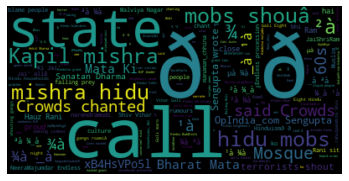

In [42]:
textt = " ".join(tweet for tweet in meta_unique.tweet)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_paper.png')
plt.show()

In [56]:
# Train word2vec using CBOW
#create a model with gensim.models.Word2Vec, add parameters
#removed batch_words from this

import gensim
model = gensim.models.Word2Vec(words_by_sentence, window=5, min_count=3, sg=0, alpha=0.025)

In [57]:
words_by_sentence

[['gudiyaqazplm579', 'jai', 'shree', 'ram', 'â\x98ºsubh', 'prabhat', 'â\x98º'],
 ['aajtak', 'shivendraaajtak', 'jai', 'shri', 'ram'],
 ['koti',
  'koti',
  'naman',
  'vandematram1130',
  'for',
  'your',
  'kind',
  'words',
  'and',
  'appreciation',
  'it',
  'means',
  'a',
  'lot',
  'provides',
  'more',
  'strength',
  'to',
  'fight',
  'for',
  'dharma'],
 ['dhanyabad',
  'for',
  'your',
  'beningn',
  'supportmay',
  'mahadev',
  'will',
  'strengthen',
  'gives',
  'more',
  'power',
  'to',
  'you'],
 ['jai', 'shree', 'ram', 'ð\x9f\x99\x8fð\x9f\x99\x8f', 'httpstcoddxzu7dwhv'],
 ['anjuladli', 'jai', 'shri', 'ram', 'jai', 'hanuman'],
 ['jai',
  'shree',
  'ram',
  'à¤¹à¤¾à¤\x81à¤®à¥\x88à¤\x82à¤¹à¤¿à¤¨à¥\x8dà¤¦à¥\x82à¤¹à¥\x81à¤\x81'],
 ['desithug1',
  'indiaarthistory',
  'punarutthana',
  'dharmicverangna',
  'ugtunga',
  'realthsandeep',
  'iamvinitshinde',
  'agandhig',
  'vrafans',
  'shekharsurvi',
  'humare',
  'desh',
  'ke',
  'kuch',
  'yuva',
  'bas',
  'nanga',
  '

In [58]:
#get an array of similarity scores in relation to 'trump'
#remember to mention words in lowercase because tokenization has removed uppercase

model.wv['jaishriram']

array([-7.0042089e-02,  4.3412226e-01, -7.4904121e-02, -4.7178153e-02,
        3.0038619e-01, -4.6193218e-01,  5.9980571e-01,  9.7403914e-01,
       -1.7345163e-01, -3.4381855e-01,  5.1557380e-03, -5.0997078e-01,
       -3.4977227e-01,  7.9933316e-02, -4.1825216e-02, -1.8870686e-01,
        1.4527614e-02, -1.8096726e-02, -4.5778894e-01, -4.9497852e-01,
        4.3175647e-01,  1.6708249e-02,  4.9105296e-01, -2.1451937e-01,
        2.0501699e-01,  5.3691652e-02, -6.9887020e-02, -4.6007755e-01,
       -2.7212077e-01, -1.9068946e-01,  2.8514761e-01,  1.3494819e-01,
       -4.9959842e-02, -9.4339058e-02, -5.1559703e-03,  5.5038828e-01,
       -4.2867297e-01, -5.1406586e-01, -1.5328015e-01, -5.3291863e-01,
        2.8122169e-01, -2.7321914e-01, -1.3669647e-01, -3.1467751e-01,
        2.6806486e-01,  1.1261023e-01, -3.4812984e-01, -3.7168283e-02,
        2.1673691e-01,  4.4640493e-01,  3.7876999e-01, -4.8084292e-01,
       -1.3733502e-01, -3.7079543e-02, -4.8086822e-01,  6.6084035e-02,
      

In [60]:
model.wv.similarity('crowds', 'hindu'), model.wv.similarity('hindus', 'mob'), model.wv.similarity('hindus', 'muslims'), model.wv.similarity('muslims', 'mob')
#the hindu-muslim comparison just shows it works because they are both religion-linked

(0.68269396, 0.99737465, 0.99598235, 0.9960927)

In [61]:
#n_similarity scores for this
#suggests that immigration and freedom were used almost equally proportionately with trump

model.wv.n_similarity(['crowds','hindu'],['crowds','muslims']), model.wv.similarity('crowds', 'speech')

(0.9472155, 0.6803206)

In [62]:
model.wv.similarity('feel','proud'), model.wv.similarity('hindu', 'proud'), model.wv.similarity('muslim', 'proud')

(0.9855967, 0.99211884, 0.9913531)

In [63]:
model.wv.similarity('country', 'hindu'), model.wv.similarity('country', 'muslim')

(0.99476707, 0.99453115)

In [64]:
model.wv.similarity('muslims', 'riot'), model.wv.similarity('hindus', 'riot'), model.wv.similarity('crowds', 'riot')
#notable -- hindus and muslims riots

(0.99625254, 0.99704546, 0.68701404)

In [65]:
model.wv.similarity('ram', 'mob'), model.wv.similarity('ram', 'state'), model.wv.similarity('ram', 'crowds')

#ram linked to STATE and MOB -- Hinduism

(0.93990487, 0.9354713, 0.8654049)

In [66]:
model.wv.similarity('ram', 'mosque')

0.94094574

In [67]:
model.wv.doesnt_match(['india', 'hindus', 'muslims'])

#key thing to be noted here -- MUSLIMS odd one out

'muslims'

In [68]:
model.wv.doesnt_match(['jaishriram','india', 'muslims'])

#MUSLIMS odd one out again

'muslims'

In [69]:
model.wv.doesnt_match(['tolerance','hindus', 'muslims', 'india'])

'muslims'

In [70]:
model.wv.doesnt_match(['crowds','hindus', 'kill']), model.wv.doesnt_match(['crowds','muslims', 'kill'])

#while they are both communities that form crowds, they are most commonly associated with 'kill'

('crowds', 'crowds')

In [71]:
model.wv.doesnt_match(['kill', 'riots', 'mandir']), model.wv.doesnt_match(['mandir', 'dharma', 'bjp'])

#Interesting -- Mandir should be odd one out and BJP should be odd one out but they aren't, shows their affective dispositions

('kill', 'dharma')

In [73]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['hindu', 'muslim'], topn=50)
                                                    

[('their', 0.999567449092865),
 ('they', 0.9994805455207825),
 ('the', 0.9994752407073975),
 ('jaishriram', 0.999417781829834),
 ('a', 0.9993801712989807),
 ('who', 0.9993748068809509),
 ('his', 0.9993698596954346),
 ('me', 0.9993497729301453),
 ('bjp', 0.9993247389793396),
 ('for', 0.9993218183517456),
 ('ko', 0.9992844462394714),
 ('as', 0.9992793798446655),
 ('hai', 0.9992574453353882),
 ('ka', 0.999253511428833),
 ('our', 0.9992499947547913),
 ('have', 0.9992382526397705),
 ('was', 0.9992344379425049),
 ('ho', 0.9992271065711975),
 ('à¤', 0.9992232322692871),
 ('à¤®à¥\x87à¤\x82', 0.9992162585258484),
 ('bhi', 0.999213695526123),
 ('aur', 0.999201238155365),
 ('he', 0.9991918206214905),
 ('à¤¹à¥\x88', 0.9991720914840698),
 ('to', 0.9991690516471863),
 ('be', 0.9991625547409058),
 ('that', 0.9991531372070312),
 ('à¤¸à¥\x87', 0.9991526007652283),
 ('or', 0.9991503357887268),
 ('mandir', 0.9991468787193298),
 ('ke', 0.9991173148155212),
 ('naam', 0.9991136789321899),
 ('hi', 0.99910002

In [74]:
# Most similar terms
#["1", "amp", "disabled", "artical", "edit", "rt",
                                                               #"wikipedia", "amp", "theskindoctor13", "abhinavrajvansi",
                                                               #"foot", "pm", "pnrathod1", "drsdwivedi7", "muralydoctrack1", 
                                                               #"sanjaygobind", "vaidyvoice", "dilipswatisri", "romy1965", 
                                                               #"rajesh201963", "kanimozhi", "shawshanko", "divya0094", "riturathaur", "120crorehindus", "mvnair212",
                                                               #"akri2000", "bhaktswamy", "bjpgmdasspondy", "kavya249", "sankalpa", "ist", "exactly",
                                                               #"pradesh", "uttar", 
                                                               #"kindly", "reply", "bjp4india", "pls", "tweet", "followers", "creativeindian9", "yeah", 
                                                               #"gautamshandily5", "ji", "fadnavis", "piyushgoyal", "good", "ranaayyub", "rt", 
                                                               #'i', "of", "the", "will", "a", "is", "in", "on", "it", "to", "that", "be", "not", 'me', 'my', 'we', 'our', 'you', 'your',
                                                               #'he', 'his', 'she', 'her', 'it', 'its',
                                                               #'they', 'them', 'their', 'what', 'which', 'who', 'this', 'that', 'these', 'those', 
                                                               #'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'did', 'doing', 
                                                               #'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'while', 'of', 
                                                               #'at', 'by', 'for', 'with', 'about', 'against', 'into', 'during', 
                                                               #'after', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'over', 'again', 'then', 'once','there', 'when', 
                                                               #'where', 'why', 'how', 'all', 'any', 'few', 'more', 'most', 'other', 'some', 'such', 
                                                               #'no', 'not', 'only', 'own', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'should', 'now']

#top number of words similar to these
model.wv.most_similar(positive=['crowds', 'muslim'], topn=35)

[('amp', 0.9970157146453857),
 ('shri', 0.9926103353500366),
 ('ram', 0.9853408336639404),
 ('in', 0.9826227426528931),
 ('jai', 0.979536771774292),
 ('said', 0.9580976366996765),
 ('60s', 0.954972505569458),
 ('sit', 0.9525542855262756),
 ('mata', 0.950467050075531),
 ('shree', 0.950390636920929),
 ('werewolf', 0.9496906399726868),
 ('rani', 0.9488760232925415),
 ('she', 0.945350170135498),
 ('bharat', 0.9425517916679382),
 ('quâ\x80¦', 0.9422014951705933),
 ('hauz', 0.9410381317138672),
 ('which', 0.9404172897338867),
 ('chanted', 0.9396181702613831),
 ('ji', 0.9379759430885315),
 ('ramâ\x80¦', 0.9379075765609741),
 ('ki', 0.9366339445114136),
 ('sauryamishrabjp', 0.9352273344993591),
 ('feminist', 0.935174822807312),
 ('caa', 0.9350945949554443),
 ('ð\x9f\x99\x8fð\x9f\x99\x8f', 0.9329115748405457),
 ('and', 0.932636559009552),
 ('donâ\x80\x99t', 0.9324116706848145),
 ('hind', 0.932374119758606),
 ('jpnadda', 0.932160496711731),
 ('shouting', 0.9319378137588501),
 ('nagar', 0.9317622

In [75]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['hindu', 'goli', 'muslims'], topn=35)

[('me', 0.9993472099304199),
 ('to', 0.9993440508842468),
 ('ko', 0.9993435740470886),
 ('aur', 0.9993044137954712),
 ('ka', 0.9992867708206177),
 ('a', 0.9992799758911133),
 ('his', 0.9992785453796387),
 ('hai', 0.9992727637290955),
 ('à¤®à¥\x87à¤\x82', 0.9992467164993286),
 ('the', 0.9992311000823975),
 ('ho', 0.9992308616638184),
 ('for', 0.999228835105896),
 ('bjp', 0.9991883039474487),
 ('bhi', 0.9991768598556519),
 ('ke', 0.9991759657859802),
 ('who', 0.9991682171821594),
 ('jaishriram', 0.9991642832756042),
 ('à¤¹à¥\x88', 0.9991599917411804),
 ('was', 0.9991355538368225),
 ('have', 0.9991256594657898),
 ('à¤¸à¥\x87', 0.9991227984428406),
 ('se', 0.9991225004196167),
 ('or', 0.9991220235824585),
 ('allah', 0.999103307723999),
 ('à¤', 0.999097466468811),
 ('bhai', 0.999085545539856),
 ('as', 0.9990736246109009),
 ('hi', 0.9990729093551636),
 ('à¤¨à¥\x87', 0.9990629553794861),
 ('at', 0.9990570545196533),
 ('mandir', 0.9990469813346863),
 ('kya', 0.9990416169166565),
 ('nutanjyot',

In [76]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['jaishriram', 'riot'], topn=35)

[('they', 0.9994941353797913),
 ('the', 0.9993959665298462),
 ('ko', 0.9993821382522583),
 ('who', 0.9993704557418823),
 ('a', 0.9993654489517212),
 ('à¤', 0.9993572235107422),
 ('muslim', 0.9993523359298706),
 ('his', 0.9993356466293335),
 ('hindu', 0.9993270635604858),
 ('hai', 0.9993075132369995),
 ('me', 0.9992707371711731),
 ('à¤®à¥\x87à¤\x82', 0.9992659091949463),
 ('ka', 0.9992643594741821),
 ('aur', 0.9992625117301941),
 ('ho', 0.9992383122444153),
 ('or', 0.9992345571517944),
 ('mandir', 0.9992319345474243),
 ('was', 0.9992185831069946),
 ('for', 0.999207079410553),
 ('have', 0.9992052316665649),
 ('at', 0.9992050528526306),
 ('ke', 0.9991990923881531),
 ('he', 0.9991796612739563),
 ('their', 0.9991743564605713),
 ('à¤¥à¤¾', 0.9991722702980042),
 ('à¤¹à¥\x88', 0.9991707801818848),
 ('that', 0.9991663694381714),
 ('à¤¸à¥\x87', 0.9991627931594849),
 ('allah', 0.9991557598114014),
 ('bjp', 0.9991514086723328),
 ('à¤\x95à¥\x87', 0.999130129814148),
 ('à¤°à¤¾à¤®', 0.999124228954315

In [77]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['riot', 'muslim'], topn=35)

[('they', 0.9993134140968323),
 ('hindu', 0.9992294311523438),
 ('the', 0.9991205930709839),
 ('their', 0.9991109371185303),
 ('jaishriram', 0.9990804195404053),
 ('who', 0.9989789724349976),
 ('à¤', 0.9989759922027588),
 ('a', 0.9989712834358215),
 ('ko', 0.9989328384399414),
 ('his', 0.9989211559295654),
 ('have', 0.9988881945610046),
 ('à¤®à¥\x87à¤\x82', 0.9988829493522644),
 ('hai', 0.9988803863525391),
 ('or', 0.9988757967948914),
 ('our', 0.9988610744476318),
 ('ho', 0.9988535046577454),
 ('me', 0.9988489747047424),
 ('was', 0.9988483786582947),
 ('ka', 0.9988411664962769),
 ('aur', 0.9988396763801575),
 ('mandir', 0.9988391399383545),
 ('victims', 0.9988229274749756),
 ('for', 0.9988194108009338),
 ('à¤¹à¥\x88', 0.9988032579421997),
 ('he', 0.9987912774085999),
 ('as', 0.9987875819206238),
 ('at', 0.9987761974334717),
 ('that', 0.9987741112709045),
 ('bjp', 0.9987702965736389),
 ('to', 0.9987594485282898),
 ('ke', 0.998735785484314),
 ('sir', 0.9987318515777588),
 ('allah', 0.99

In [78]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['hindus', 'speech'], topn=35)

[('bjp', 0.9983755350112915),
 ('his', 0.9983545541763306),
 ('1', 0.9983185529708862),
 ('only', 0.9983140826225281),
 ('that', 0.998302698135376),
 ('a', 0.9982529282569885),
 ('as', 0.9982460141181946),
 ('be', 0.9982096552848816),
 ('for', 0.9981971979141235),
 ('or', 0.99819415807724),
 ('hai', 0.9981555342674255),
 ('me', 0.998141348361969),
 ('ko', 0.9981221556663513),
 ('bhi', 0.998116672039032),
 ('to', 0.9980977773666382),
 ('ho', 0.9980924725532532),
 ('à¤®à¥\x87à¤\x82', 0.9980855584144592),
 ('mandir', 0.9980841875076294),
 ('the', 0.9980700016021729),
 ('are', 0.9980649352073669),
 ('jaishriram', 0.9980547428131104),
 ('hi', 0.9980534315109253),
 ('à¤¸à¥\x87', 0.9980387091636658),
 ('à¤°à¤¾à¤®', 0.9980140924453735),
 ('à¤¹à¥\x88', 0.9980136752128601),
 ('who', 0.9979962110519409),
 ('at', 0.9979724884033203),
 ('ke', 0.9979627132415771),
 ('will', 0.9979368448257446),
 ('our', 0.9979342818260193),
 ('why', 0.9979095458984375),
 ('à¤¥à¤¾', 0.9979057312011719),
 ('hindu', 0.

In [79]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['targeted', 'muslims'], topn=35)

[('aur', 0.9967843890190125),
 ('ho', 0.9966666102409363),
 ('à¤®à¥\x87à¤\x82', 0.9966212511062622),
 ('who', 0.996620774269104),
 ('up', 0.9965241551399231),
 ('ek', 0.9964468479156494),
 ('shiv', 0.9964198470115662),
 ('their', 0.996412456035614),
 ('me', 0.9964064955711365),
 ('à¤¹à¥\x88', 0.9963477253913879),
 ('hindu', 0.9963377118110657),
 ('sharma', 0.9962957501411438),
 ('à¤¨à¥\x87', 0.996282696723938),
 ('vihar', 0.9962507486343384),
 ('they', 0.9962484836578369),
 ('hi', 0.9962468147277832),
 ('à¤¸à¥\x87', 0.9962465167045593),
 ('leader', 0.9962259531021118),
 ('à¤', 0.996208667755127),
 ('for', 0.9961872100830078),
 ('à¤¥à¤¾', 0.9961833357810974),
 ('jaishriram', 0.9961753487586975),
 ('bjp', 0.9961720108985901),
 ('à¤\x95à¥\x8b', 0.9961700439453125),
 ('at', 0.9961686730384827),
 ('à¤\x94à¤°', 0.9961615800857544),
 ('à¤\x95à¥\x87', 0.9961498379707336),
 ('à¤\x9cà¤¯', 0.9961459636688232),
 ('be', 0.9961376190185547),
 ('bhai', 0.9961212277412415),
 ('lives', 0.99612110853195

In [80]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['hindu', 'attacked'], topn=400)

[('who', 0.9990898966789246),
 ('jaishriram', 0.9990622401237488),
 ('for', 0.9990507960319519),
 ('me', 0.9990227222442627),
 ('his', 0.9989859461784363),
 ('à¤¸à¥\x87', 0.9989550709724426),
 ('à¤¹à¥\x88', 0.998932957649231),
 ('ho', 0.9988960027694702),
 ('a', 0.9988947510719299),
 ('ko', 0.9988858103752136),
 ('the', 0.9988725781440735),
 ('muslim', 0.9988547563552856),
 ('bjp', 0.9988375306129456),
 ('be', 0.9988247156143188),
 ('hai', 0.9988049268722534),
 ('à¤®à¥\x87à¤\x82', 0.9988046288490295),
 ('à¤', 0.9987921714782715),
 ('their', 0.9987800121307373),
 ('ka', 0.9987791180610657),
 ('have', 0.9987779855728149),
 ('they', 0.998770534992218),
 ('à¤¥à¤¾', 0.998765766620636),
 ('up', 0.9987145066261292),
 ('was', 0.9987003207206726),
 ('at', 0.9986937046051025),
 ('aur', 0.9986733794212341),
 ('that', 0.9986637830734253),
 ('set', 0.998661458492279),
 ('à¤°à¤¾à¤®', 0.998656690120697),
 ('ke', 0.9986528158187866),
 ('chanting', 0.9986490607261658),
 ('naam', 0.9986429214477539),
 (

In [89]:
crowdsmuslim_vector = model.wv.most_similar(positive=['crowds', 'muslim'], topn=50)

# Just get words

crowdsmuslim_tokens = [token for token, weight in crowdsmuslim_vector]

In [82]:
# Get the vector for each sampled word

vectors = [model.wv[word] for word in crowdsmuslim_tokens] 

In [83]:
# Calculate distances among texts in vector space

from sklearn.metrics import pairwise
dist_matrix = pairwise.pairwise_distances(vectors, metric='cosine')

In [84]:
# Multi-Dimensional Scaling

from sklearn.manifold import MDS
mds = MDS(n_components = 2, dissimilarity='precomputed')
#embeddings = mds.fit_transform(dist_matrix)
#embeddings

In [85]:
#trying to repair error

#dissimilarity = check_symmetric(dissimilarity, raise_exception=True)

import numpy as np
from sklearn.utils.validation import check_symmetric

A_ = np.random.random(size=(1000, 1000))
A = A_.dot(A_.T)
A[2,1] += 1e-2

A_repaired = check_symmetric(A)       # default: raise_warning=True, raise_exception=False)
print('max error: ', np.amax(np.abs(A - A.T)))        
print('max error repaired: ', np.amax(A_repaired - A_repaired.T))

max error:  0.009999999999990905
max error repaired:  0.0


D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)


In [87]:
# Multi-Dimensional Scaling

import numpy as np

from sklearn.manifold import MDS
#mat = dist_matrix1.astype(np.float64)
mds = MDS(n_components = 2)
embeddings = mds.fit_transform(dist_matrix)
#embeddings1

D:\ANACONDA\lib\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


D:\ANACONDA\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ANACONDA\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ANACONDA\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ANACONDA\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ANACONDA\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\ANACONDA\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\ANACONDA\lib\site-packages\matplotlib\bac

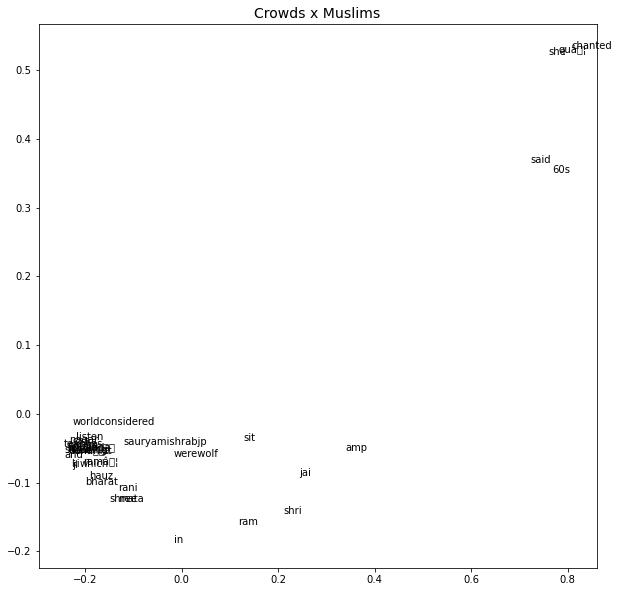

In [88]:
# Matplotlib for farmers x rights based on similarity

import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(vectors)):
    ax.annotate(crowdsmuslim_tokens[i], ((embeddings[i,0], embeddings[i,1])))
    
plt.title("Crowds x Muslims", fontsize=14)
plt.show()

In [90]:
pip install text2emotion

  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234925 sha256=79bc04eed42a6be7a8f04f6d4b72b3b4039eb29d9b725a0404dcf1003daee0fb
  Stored in directory: c:\users\anush\appdata\local\pip\cache\wheels\9a\b8\0f\f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [91]:
#Import the modules
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [92]:
#Call to the function
te.get_emotion(textt)

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [93]:
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests

In [94]:
!pip install -U LeXmo
from LeXmo import LeXmo

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
#https://betterprogramming.pub/unlocking-emotions-in-text-using-python-6d062b48d71f
emo=LeXmo.LeXmo(textt)

In [96]:
print(emo)

{'text': '@gudiyaqazplm579 Jai shree ram â\x98ºsubh prabhat â\x98º @aajtak @ShivendraAajTak Jai shri ram Koti Koti Naman @Vandematram1130 for your kind words and appreciation, it means a lot, provides more strength to fight for Dharma. Dhanyabad for your beningn support..May Mahadev will strengthen, gives more power to you. Jai Shree Ram ð\x9f\x99\x8fð\x9f\x99\x8f https://t.co/DdXZU7Dwhv @anju_ladli Jai shri ram jai hanuman Jai Shree Ram #à¤¹à¤¾à¤\x81_à¤®à¥\x88à¤\x82_à¤¹à¤¿à¤¨à¥\x8dà¤¦à¥\x82_à¤¹à¥\x81à¤\x81 @desi_thug1 @IndiaArtHistory @punarutthana @dharmicverangna @ugtunga @realth_sandeep @iamvinitshinde @AGANDHIG @VRAFans @ShekharSurvi Humare desh ke kuch yuva bas nanga nach jante hai bas, see this beauty ð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8cð\x9f\x91\x8c Jai Shree Ramð\x9f\x99\x8f RT @DeeVenShe: @LostTemple7 @Me_InSoLiTuDe This is the only Rama Temple where instead of Hanuman, Sugreeva is at the Lord\'s feet. The entirâ\x80¦ @DSCHAUDHARY24 Jai shree ram @PTI_News Ver

In [97]:
#now visualization
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust'] 
degrees = [0.060246971519080164, 0.049071656938374446, 0.0054263338515237736, 0.017305605256210953, 0.013111195846654738, 0.058751063268119554, 0.020766726307453142, 0.008095503475786818, 0.01223124981667791, 0.011615287595694131]      #Now GRAPH this shit

In [98]:
import matplotlib.pyplot as plt

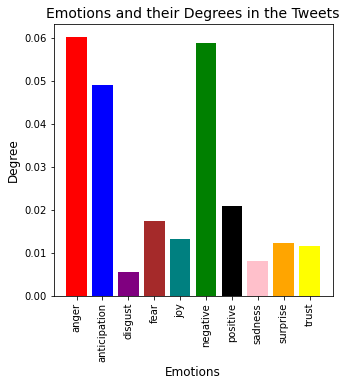

In [115]:
colors = ['red', 'blue', 'purple', 'brown', 'teal', 'green', 'black', 'pink', 'orange', 'yellow']
plt.bar(emotions, degrees, color=colors)
plt.title('Emotions and their Degrees in the Tweets', fontsize=14)
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Degree', fontsize=12)
# changing the rc parameters and plotting a line plot
plt.xticks(rotation=90)
plt.figure
#plt.rcParams['figure.figsize'] = [5, 5]
#plt.figure(figsize=(20, 20))
plt.show()